# Demonstration that SDSS-like "white" flux is good at separating stars and galaxies

The photometric classifier employed by the `Photo` pipeline to separate stars and galaxies in SDSS imaging compared the ratio of total PSF *counts* to cModel *counts*, in all bands where the source was detected, to separate stars and galaxies. 

PS1 does not provide an SDSS-like `Model` flux measurement, so we use Kron measurements instead. Additionally, we sum the flux in each filter (though it is possible to sum the counts using the zero points provided by PS1). We avoid counts in this case as the exposure times are not standard across all filters for all sources.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

%matplotlib notebook

In [2]:
sg = pd.read_csv("./playground/MyTable_1_adamamiller.csv")

In [121]:
ps1_table = Table.read("mean_vs_stack_adamamiller.fit")

In [122]:
ps1_df = ps1_table.to_pandas()

In [151]:
stack_psf_flux_w = np.zeros(len(ps1_df))
stack_kron_flux_w = np.zeros(len(ps1_df))

mean_psf_flux_w = np.zeros(len(ps1_df))
mean_kron_flux_w = np.zeros(len(ps1_df))

for filt, weight in zip(['g', 'r', 'i', 'z', 'y'], [1, 1, 1, 1, 1]):
    mean_psf_det = np.array(ps1_df[filt + 'MeanPSFMag'] > 0).astype(int)*weight
    mean_kron_det = np.array(ps1_df[filt + 'MeanKronMag'] > 0).astype(int)*weight    
    
    mean_psf_det_flux = mean_psf_det*np.power(10, -0.4*(ps1_df[filt + 'MeanPSFMag'].values + 48.6),                                               
                                              out = np.zeros_like(mean_psf_flux_w),
                                              where = ps1_df[filt + 'MeanPSFMag'].values != -999)/1e-23
    
    mean_kron_det_flux = mean_kron_det*np.power(10, -0.4*(ps1_df[filt + 'MeanKronMag'].values + 48.6),
                                              out = np.zeros_like(mean_kron_flux_w),
                                              where = ps1_df[filt + 'MeanKronMag'].values != -999)/1e-23
    
    mean_psf_flux_w += mean_psf_det_flux
    mean_kron_flux_w += mean_kron_det_flux
    
    stack_psf_det = np.array(ps1_df[filt + 'PSFFlux'] > 0).astype(int)
    stack_kron_det = np.array(ps1_df[filt + 'KronFlux'] > 0).astype(int)         
    
    stack_psf_det_flux = stack_psf_det*ps1_df[filt + 'PSFFlux'].values
    stack_kron_det_flux = stack_kron_det*ps1_df[filt + 'KronFlux'].values
                    
    stack_psf_flux_w += stack_psf_det_flux
    stack_kron_flux_w += stack_kron_det_flux
    
mean_flux_ratio = np.divide(mean_psf_flux_w, mean_kron_flux_w, 
                         out = np.zeros_like(mean_psf_flux_w), 
                         where = mean_kron_flux_w != 0)
mean_kwargs = {'mean_psfKronRatio' : mean_flux_ratio}
ps1_df = ps1_df.assign(**mean_kwargs)
stack_flux_ratio = np.divide(stack_psf_flux_w, stack_kron_flux_w, 
                         out = np.zeros_like(stack_psf_flux_w), 
                         where = stack_kron_flux_w != 0)
stack_kwargs = {'stack_psfKronRatio' : stack_flux_ratio}
ps1_df = ps1_df.assign(**stack_kwargs)

<IPython.core.display.Javascript object>


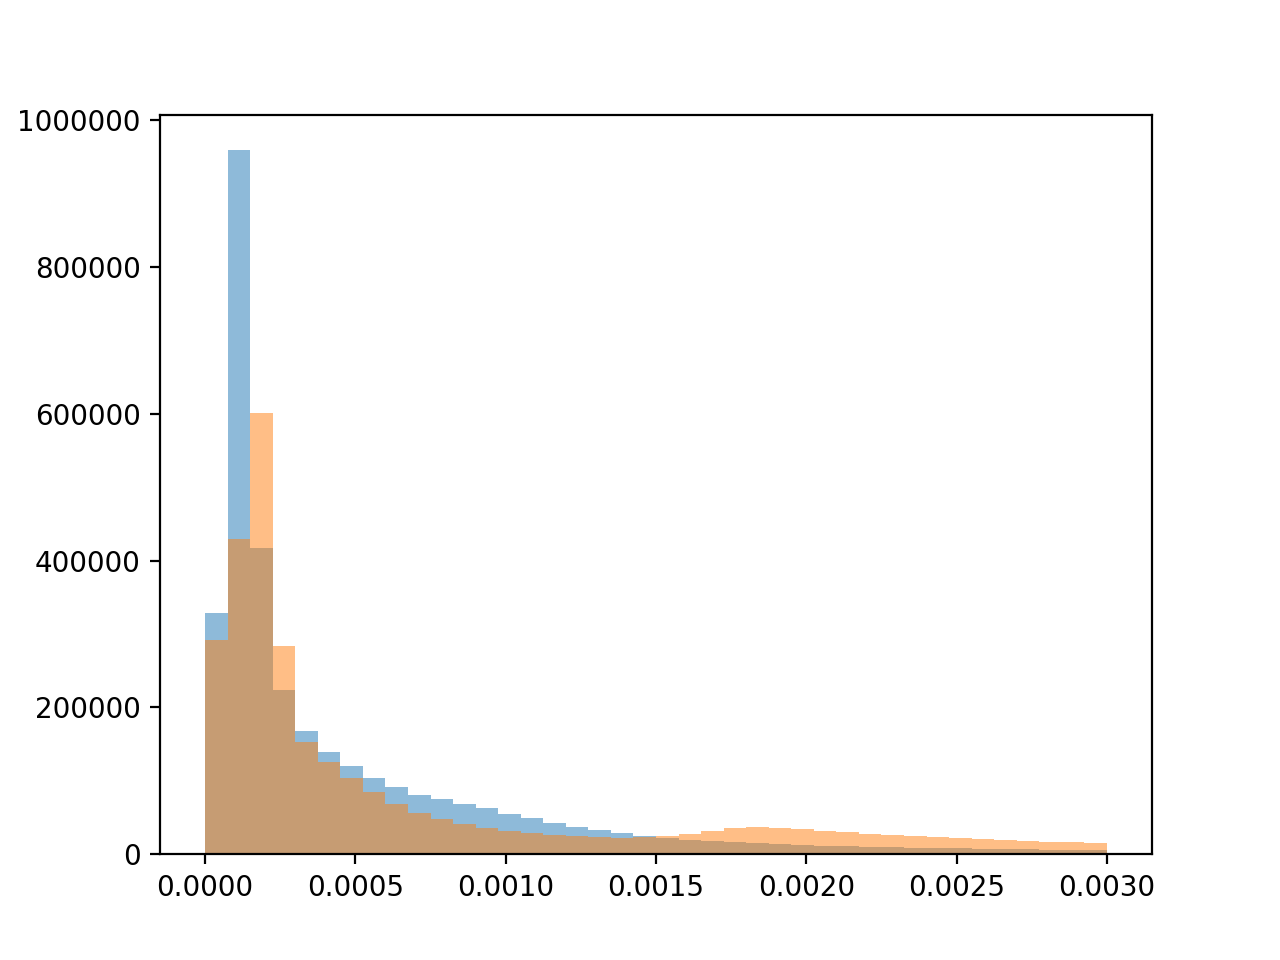

(array([ 292342.,  428968.,  601380.,  283530.,  153136.,  125880.,
         103962.,   85020.,   68258.,   56433.,   47584.,   41271.,
          35821.,   31794.,   28753.,   26398.,   24602.,   23524.,
          22928.,   23250.,   25294.,   28131.,   31629.,   35482.,
          37163.,   36034.,   34725.,   32203.,   30025.,   28031.,
          26351.,   24591.,   23237.,   22041.,   20593.,   19356.,
          18578.,   17246.,   16615.,   15459.]),
 array([  0.00000000e+00,   7.50000000e-05,   1.50000000e-04,
          2.25000000e-04,   3.00000000e-04,   3.75000000e-04,
          4.50000000e-04,   5.25000000e-04,   6.00000000e-04,
          6.75000000e-04,   7.50000000e-04,   8.25000000e-04,
          9.00000000e-04,   9.75000000e-04,   1.05000000e-03,
          1.12500000e-03,   1.20000000e-03,   1.27500000e-03,
          1.35000000e-03,   1.42500000e-03,   1.50000000e-03,
          1.57500000e-03,   1.65000000e-03,   1.72500000e-03,
          1.80000000e-03,   1.87500000e-03,   

In [152]:
plt.hist(stack_psf_flux_w,bins = 40,range = (0,.003), alpha = 0.5)
plt.hist(stack_kron_flux_w,bins = 40,range = (0,.003), alpha = 0.5)

<IPython.core.display.Javascript object>


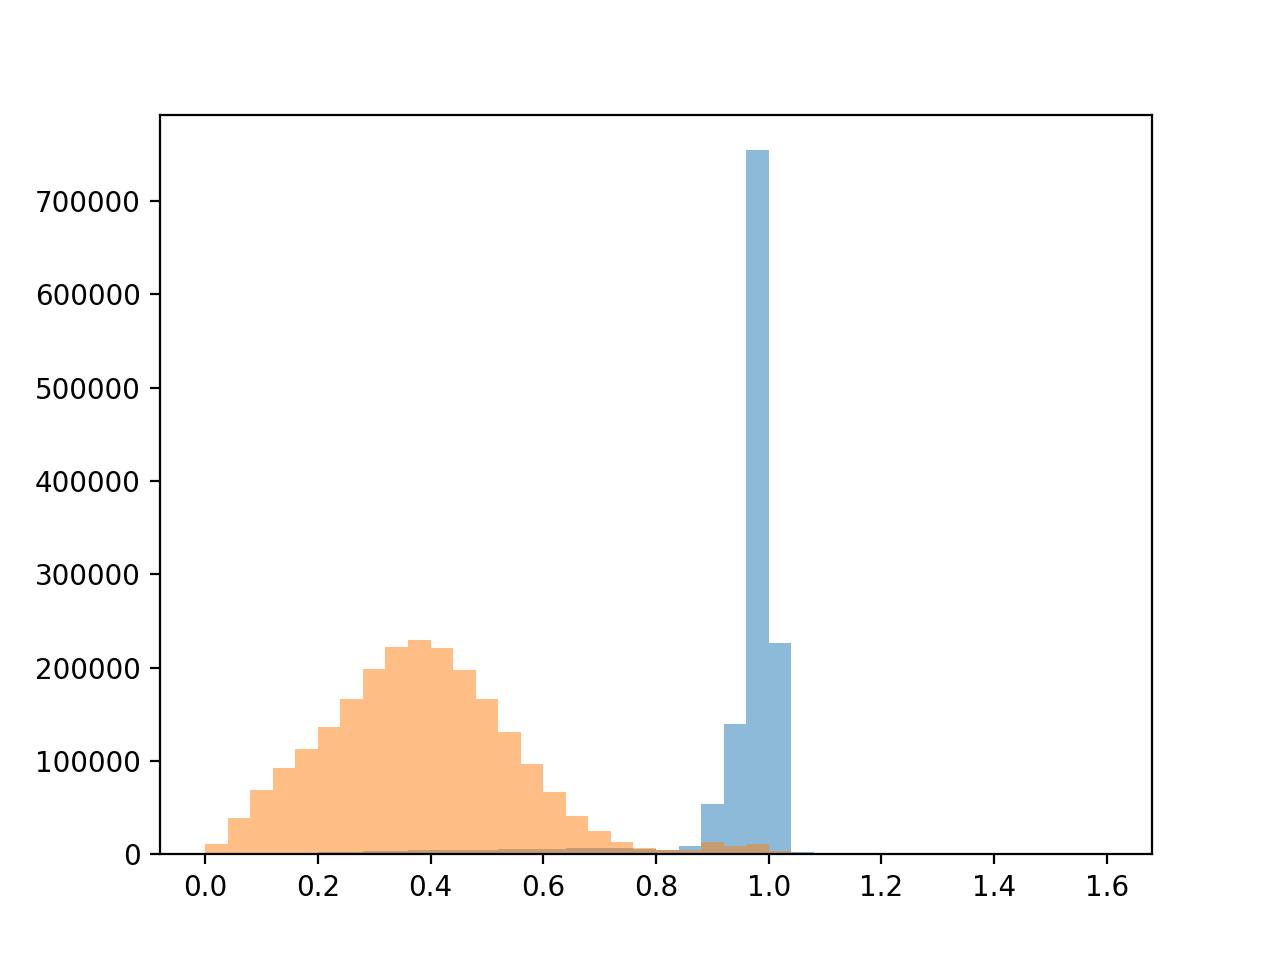

<IPython.core.display.Javascript object>


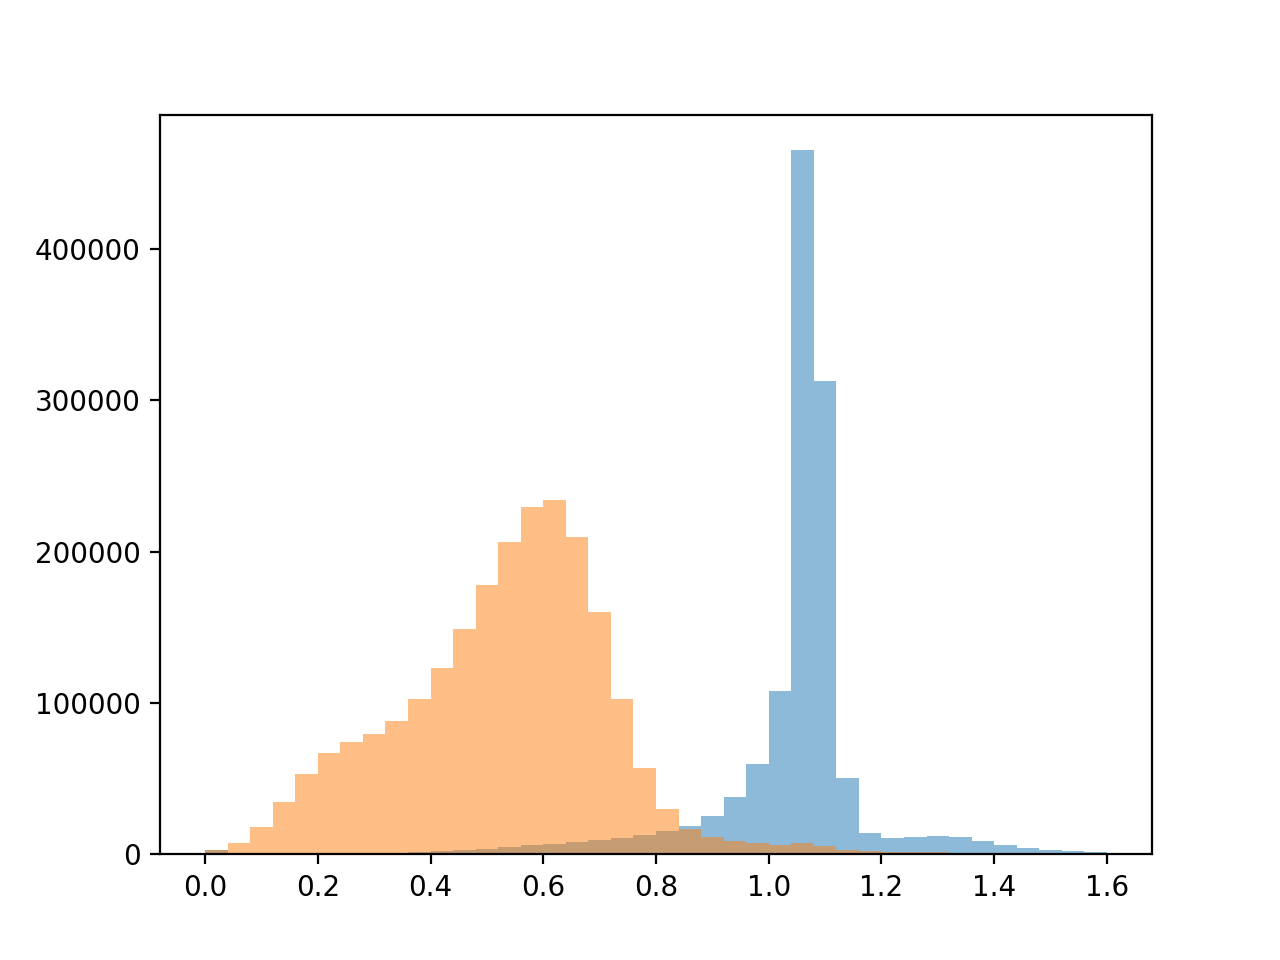

<IPython.core.display.Javascript object>


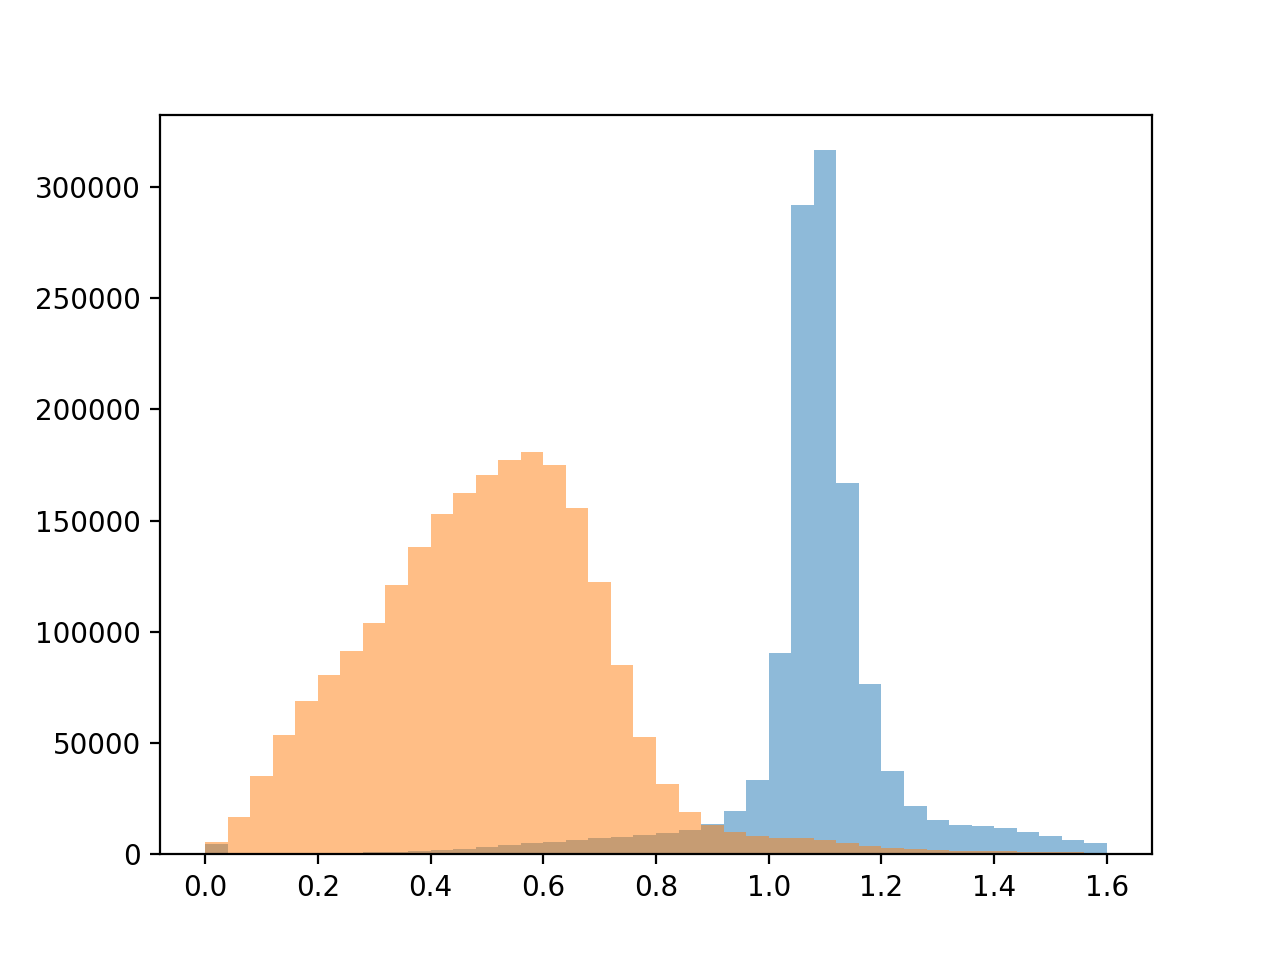

(array([   5756.,   16837.,   35376.,   53557.,   69012.,   80471.,
          91337.,  103948.,  121200.,  137962.,  152842.,  162511.,
         170350.,  177425.,  180747.,  174952.,  155584.,  122417.,
          84911.,   52976.,   31564.,   19118.,   13381.,   10231.,
           8377.,    7323.,    7272.,    6454.,    4975.,    3654.,
           2753.,    2274.,    1961.,    1709.,    1559.,    1380.,
           1215.,    1147.,    1017.,     842.]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ,  1.04,
         1.08,  1.12,  1.16,  1.2 ,  1.24,  1.28,  1.32,  1.36,  1.4 ,
         1.44,  1.48,  1.52,  1.56,  1.6 ]),
 <a list of 40 Patch objects>)

In [153]:
# stars = np.where((sg['class'] != 'GALAXY'))[0]
# gals = np.where((sg['class'] == 'GALAXY'))[0]

# check how well sources are separated at faint fluxes
stars = np.where((ps1_df['class'] != 'GALAXY'))[0]
gals = np.where((ps1_df['class'] == 'GALAXY'))[0]

plt.figure()
plt.hist(ps1_df['countRatio'].ix[stars], bins = 40, range = (0,1.6), alpha = 0.5)
plt.hist(ps1_df['countRatio'].ix[gals], bins = 40, range = (0,1.6), alpha = 0.5)
plt.figure()
plt.hist(mean_flux_ratio[stars], bins = 40, range = (0,1.6), alpha = 0.5)
plt.hist(mean_flux_ratio[gals], bins = 40, range = (0,1.6), alpha = 0.5)
plt.figure()
plt.hist(stack_flux_ratio[stars], bins = 40, range = (0,1.6), alpha = 0.5)
plt.hist(stack_flux_ratio[gals], bins = 40, range = (0,1.6), alpha = 0.5)

As is the case for SDSS, the construction of a summed flux over all bands produces a good single metric for the separation of stars and galaxies. The PS1 docs advocate for a cut on `iPSFMag-iKronMag` < 0.05 to identify stars. For our flux ratios that would correspond to the following:

$$
m_\mathrm{PSF} - m_\mathrm{Kron} < 0.05 \\
-2.5 \log \frac{f_\mathrm{PSF}}{f_\mathrm{Kron}} < 0.05 \\
\frac{f_\mathrm{PSF}}{f_\mathrm{Kron}} > 0.955
$$

If we adopt this cut, it results in the following TPR and FPR for identifying stars. 

In [154]:
from sklearn.metrics import accuracy_score

ps1_flux_cut = 0.955

y = np.zeros(len(ps1_df))
y[np.where(ps1_df['class'] != 'GALAXY')] = 1
stack_acc = accuracy_score(y, stack_flux_ratio > ps1_flux_cut)
mean_acc = accuracy_score(y, mean_flux_ratio > ps1_flux_cut)
sdss_acc = accuracy_score(y, ps1_df["countRatio"] > ps1_flux_cut)

print(
"""Adopting the PS1 docs cut (stars > 0.955)
the accuracy of the white flux models is:
{:.4f}, {:.4f}, {:.4f} for the
SDSS, PS1 Mean, and PS1 Stack respectively""".format(sdss_acc, mean_acc, stack_acc))

Adopting the PS1 docs cut (stars > 0.955)
the accuracy of the white flux models is:
0.9225, 0.9391, 0.9482 for the
SDSS, PS1 Mean, and PS1 Stack respectively


When adopting the suggested cut from the PS1 docs, it is clear that PS1 provides a better overall accuracy than SDSS. However, the plot above shows that such a cut is conservative and misclassifies a substantial portion of the stars in the tail of the PS1 distribution. The above plots generally show that the tails are fatter for the photometry from PS1.

As an alternative, we examine the ROC curves and maximum informedness ($= \mathrm{TPR} - \mathrm{FPR}$) of the 3 different models.

In [155]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_sdss, tpr_sdss, thresh_sdss = roc_curve(y, ps1_df["countRatio"])
roc_auc_sdss = roc_auc_score(y, ps1_df["countRatio"])
fpr_mean, tpr_mean, thresh_mean = roc_curve(y, mean_flux_ratio)
roc_auc_mean = roc_auc_score(y, mean_flux_ratio)
fpr_stack, tpr_stack, thresh_stack = roc_curve(y, stack_flux_ratio)
roc_auc_stack = roc_auc_score(y, stack_flux_ratio)

max_inform_sdss = max(tpr_sdss - fpr_sdss)
max_thresh_sdss = thresh_sdss[np.argmax(tpr_sdss - fpr_sdss)]

max_inform_mean = max(tpr_mean - fpr_mean)
max_thresh_mean = thresh_mean[np.argmax(tpr_mean - fpr_mean)]

max_inform_stack = max(tpr_stack - fpr_stack)
max_thresh_stack = thresh_stack[np.argmax(tpr_stack - fpr_stack)]

print(
"""The informedness of the white flux models is:
{:.4f},{:.4f} {:.4f},{:.4f} {:.4f},{:.4f} for the
SDSS, PS1 Mean, and PS1 Stack respectively""".format(max_inform_sdss,max_cut_sdss,
                                                     max_inform_mean,max_cut_mean,
                                                     max_inform_stack, max_cut_stack))

print(
"""The area under the ROC curve for the three models:
{:.4f}, {:.4f}, {:.4f} for SDSS, mean, and stack""".format(roc_auc_sdss, roc_auc_mean,
                                                           roc_auc_stack))

The informedness of the white flux models is:
0.9193,0.7500 0.8912,0.8200 0.8934,0.8600 for the
SDSS, PS1 Mean, and PS1 Stack respectively
The area under the ROC curve for the three models:
0.9782, 0.9667, 0.9636 for SDSS, mean, and stack


From here it is clear that the SDSS model outperforms the PS1 white flux model. These improvements are at the level of a few percent. It is not immediately obvious why this would be the case since the PS1 data should, nominally, be better than the data available from SDSS. SDSS has a [median seeing of 1.3 arcsec in the r' band](http://www.sdss.org/dr12/scope/), whereas PS1 has a [median seeing of 1.19 arcsec in the r' band](https://confluence.stsci.edu/display/PANSTARRS/Pan-STARRS1+data+archive+home+page). In a single exposure, SDSS and PS1 achieve similar depth, but the $3\pi$ stacks from PS1 are all at least a full magnitude deeper than SDSS.

Without further evidence, my suspicion is that SDSS does a better job of modeling the PSF and the `cModelMag` measurements for sources than the `KronMag` measurements from PS1. SDSS also weights the $g'$ and $r'$ measurements a little higher by using raw count measurements as opposed to fluxes. TO-DO: play with weights, though this is likely not going to alter results much. 

The ROC curves themselves can be helpful in diagnosing the problem:

<IPython.core.display.Javascript object>


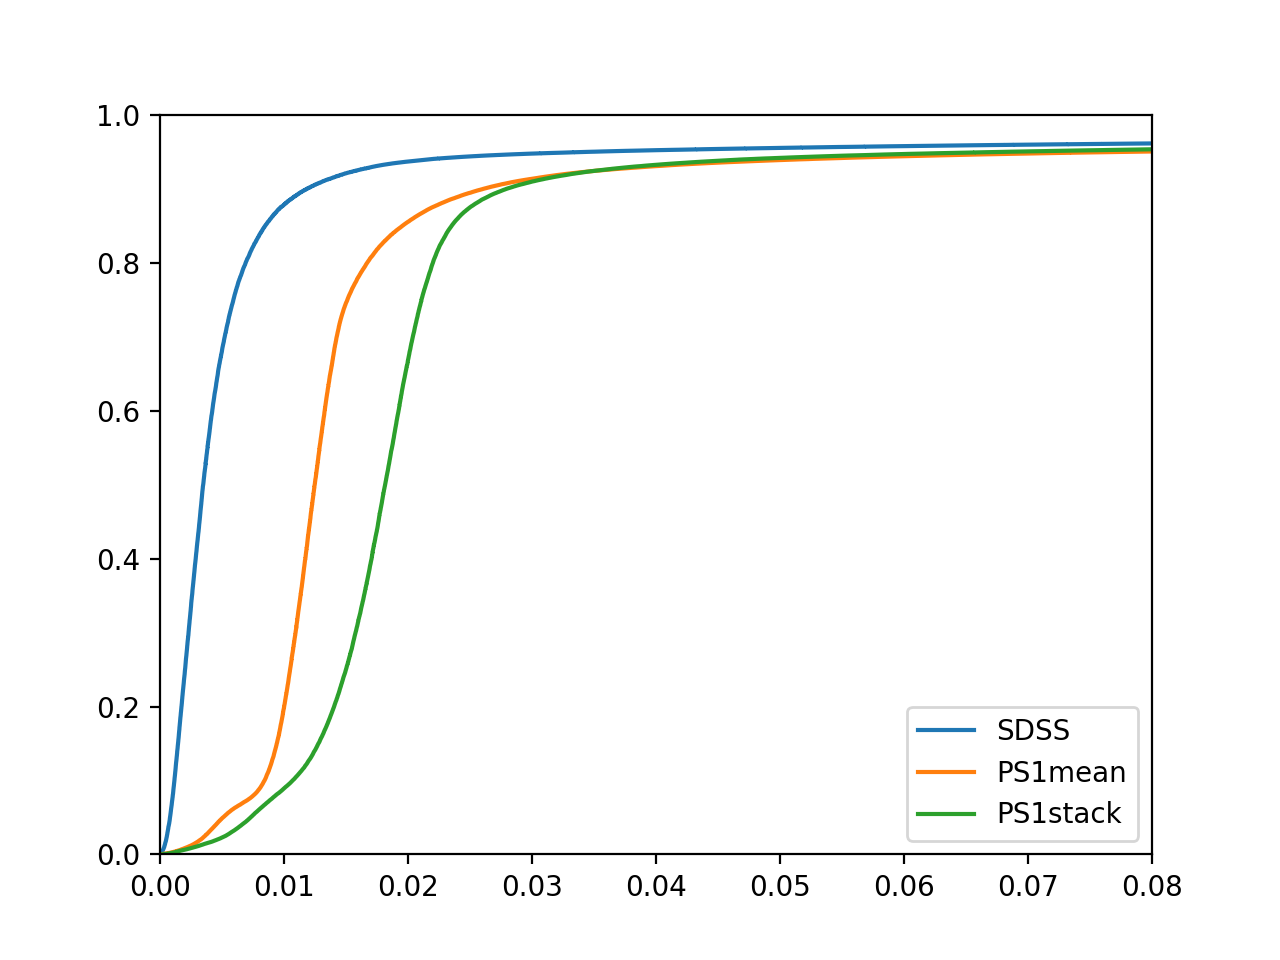

In [160]:
plt.plot(fpr_sdss, tpr_sdss, label = 'SDSS')
plt.plot(fpr_mean, tpr_mean, label = 'PS1mean')
plt.plot(fpr_stack, tpr_stack, label = 'PS1stack')
plt.xlim(0,0.08)
plt.ylim(0,1)
plt.legend()

From the ROC curves it is clear that (probably) all of the difference between SDSS and PS1 is the large number of false positives for PS1 at high threshold values. In other words, for some reason a significant fraction of galaxies, ~1%, have very high psfFlux/KronFlux ratios. 

If we can isolate those sources, then it may be possible to better separate stars and galaxies in the PS1 data.

It turns out that ~0.5% of galaxies have flux ratios > 1.5 in PS1 stacks. This is likely due to the definition of a detection in the code generating the flux ratios:

    mean_psf_det = np.array(ps1_df[filt + 'MeanPSFMag'] > 0).astype(int)*weight
    mean_kron_det = np.array(ps1_df[filt + 'MeanKronMag'] > 0).astype(int)*weight    

A source should probably only be considered "detected" in a particular filter if there is a measurement of both the PSF flux and the Kron flux. The flags used to determine "detection" in SDSS do not relate to whether or not there is a flux measurement.

In [171]:
stack_psf_flux_w = np.zeros(len(ps1_df))
stack_kron_flux_w = np.zeros(len(ps1_df))

mean_psf_flux_w = np.zeros(len(ps1_df))
mean_kron_flux_w = np.zeros(len(ps1_df))

for filt, weight in zip(['g', 'r', 'i', 'z', 'y'], [1, 1, 1, 1, 1]):
    mean_det = np.array((ps1_df[filt + 'MeanPSFMag'] > 0) & 
                             (ps1_df[filt + 'MeanKronMag'] > 0)).astype(int)*weight    
    
    mean_psf_det_flux = mean_det*np.power(10, -0.4*(ps1_df[filt + 'MeanPSFMag'].values + 48.6),                                               
                                              out = np.zeros_like(mean_psf_flux_w),
                                              where = ps1_df[filt + 'MeanPSFMag'].values != -999)/1e-23
    
    mean_kron_det_flux = mean_det*np.power(10, -0.4*(ps1_df[filt + 'MeanKronMag'].values + 48.6),
                                              out = np.zeros_like(mean_kron_flux_w),
                                              where = ps1_df[filt + 'MeanKronMag'].values != -999)/1e-23
    
    mean_psf_flux_w += mean_psf_det_flux
    mean_kron_flux_w += mean_kron_det_flux
    
    stack_det = np.array((ps1_df[filt + 'PSFFlux'] > 0) & 
                              (ps1_df[filt + 'KronFlux'] > 0)).astype(int)         
    
    stack_psf_det_flux = stack_det*ps1_df[filt + 'PSFFlux'].values
    stack_kron_det_flux = stack_det*ps1_df[filt + 'KronFlux'].values
                    
    stack_psf_flux_w += stack_psf_det_flux
    stack_kron_flux_w += stack_kron_det_flux
    
mean_flux_ratio = np.divide(mean_psf_flux_w, mean_kron_flux_w, 
                         out = np.zeros_like(mean_psf_flux_w), 
                         where = mean_kron_flux_w != 0)
mean_kwargs = {'mean_psfKronRatio' : mean_flux_ratio}
ps1_df = ps1_df.assign(**mean_kwargs)
stack_flux_ratio = np.divide(stack_psf_flux_w, stack_kron_flux_w, 
                         out = np.zeros_like(stack_psf_flux_w), 
                         where = stack_kron_flux_w != 0)
stack_kwargs = {'stack_psfKronRatio' : stack_flux_ratio}
ps1_df = ps1_df.assign(**stack_kwargs)

Requiring both measurements results in only ~0.01% of galaxies with flux ratios > 1.5, so this simple change corrects a lot of the issues identified above.

It'd be good to additionally inspect flags for these sources, but this likely is the only change needed to get more sensible results.

In [174]:
ps1_flux_cut = 0.955

y = np.zeros(len(ps1_df))
y[np.where(ps1_df['class'] != 'GALAXY')] = 1
stack_acc = accuracy_score(y, stack_flux_ratio > ps1_flux_cut)
mean_acc = accuracy_score(y, mean_flux_ratio > ps1_flux_cut)
sdss_acc = accuracy_score(y, ps1_df["countRatio"] > ps1_flux_cut)

print(
"""Adopting the PS1 docs cut (stars > 0.955)
the accuracy of the white flux models is:
{:.4f}, {:.4f}, {:.4f} for the
SDSS, PS1 Mean, and PS1 Stack respectively""".format(sdss_acc, mean_acc, stack_acc))

Adopting the PS1 docs cut (stars > 0.955)
the accuracy of the white flux models is:
0.9225, 0.9368, 0.9543 for the
SDSS, PS1 Mean, and PS1 Stack respectively


In [175]:
fpr_sdss, tpr_sdss, thresh_sdss = roc_curve(y, ps1_df["countRatio"])
roc_auc_sdss = roc_auc_score(y, ps1_df["countRatio"])
fpr_mean, tpr_mean, thresh_mean = roc_curve(y, mean_flux_ratio)
roc_auc_mean = roc_auc_score(y, mean_flux_ratio)
fpr_stack, tpr_stack, thresh_stack = roc_curve(y, stack_flux_ratio)
roc_auc_stack = roc_auc_score(y, stack_flux_ratio)

max_inform_sdss = max(tpr_sdss - fpr_sdss)
max_thresh_sdss = thresh_sdss[np.argmax(tpr_sdss - fpr_sdss)]

max_inform_mean = max(tpr_mean - fpr_mean)
max_thresh_mean = thresh_mean[np.argmax(tpr_mean - fpr_mean)]

max_inform_stack = max(tpr_stack - fpr_stack)
max_thresh_stack = thresh_stack[np.argmax(tpr_stack - fpr_stack)]

print(
"""The informedness of the white flux models is:
{:.4f},{:.4f} {:.4f},{:.4f} {:.4f},{:.4f} for the
SDSS, PS1 Mean, and PS1 Stack respectively""".format(max_inform_sdss,max_cut_sdss,
                                                     max_inform_mean,max_cut_mean,
                                                     max_inform_stack, max_cut_stack))

print(
"""The area under the ROC curve for the three models:
{:.4f}, {:.4f}, {:.4f} for SDSS, mean, and stack""".format(roc_auc_sdss, roc_auc_mean,
                                                           roc_auc_stack))

The informedness of the white flux models is:
0.9193,0.7500 0.8974,0.8200 0.9066,0.8600 for the
SDSS, PS1 Mean, and PS1 Stack respectively
The area under the ROC curve for the three models:
0.9782, 0.9731, 0.9735 for SDSS, mean, and stack


<IPython.core.display.Javascript object>


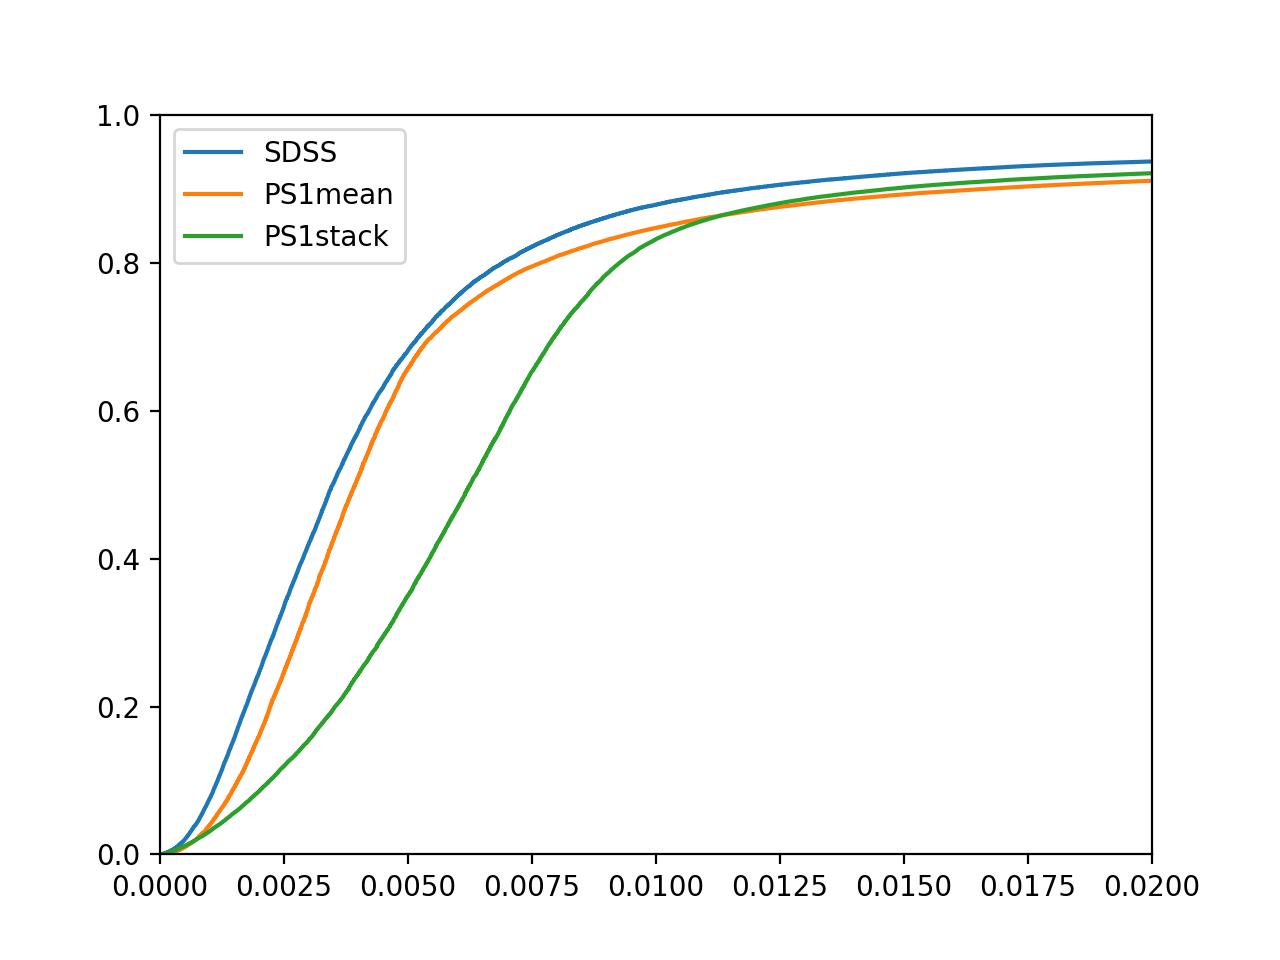

In [192]:
plt.plot(fpr_sdss, tpr_sdss, label = 'SDSS')
plt.plot(fpr_mean, tpr_mean, label = 'PS1mean')
plt.plot(fpr_stack, tpr_stack, label = 'PS1stack')
plt.xlim(0,0.02)
plt.ylim(0,1)
plt.legend()

Interestingly, this change significantly improves the performance of the two PS1 models, though the overall performance of SDSS still appears to be better than the two PS1 models. The catch all metrics provide evidence showing that the Stack model is better, but it's clear from looking at the ROC curves that in the LIGO-optimized scenario of minimizing the number of galaxy false positives to be < 1%, the mean photometry is better than the Kron photometry.

The final thing I want to try and understand is which sources (guess: faint) are galaxies but have high psf/Kron ratios. The cumulative distributions below confirm that faint sources are most of what is being misclassified. The colors of the faint galaxies might be slightly anomalous, but that may simply be a correlation with the fact that they are fainter [I don't know how galaxy colors change as a function of magnitude].

<IPython.core.display.Javascript object>


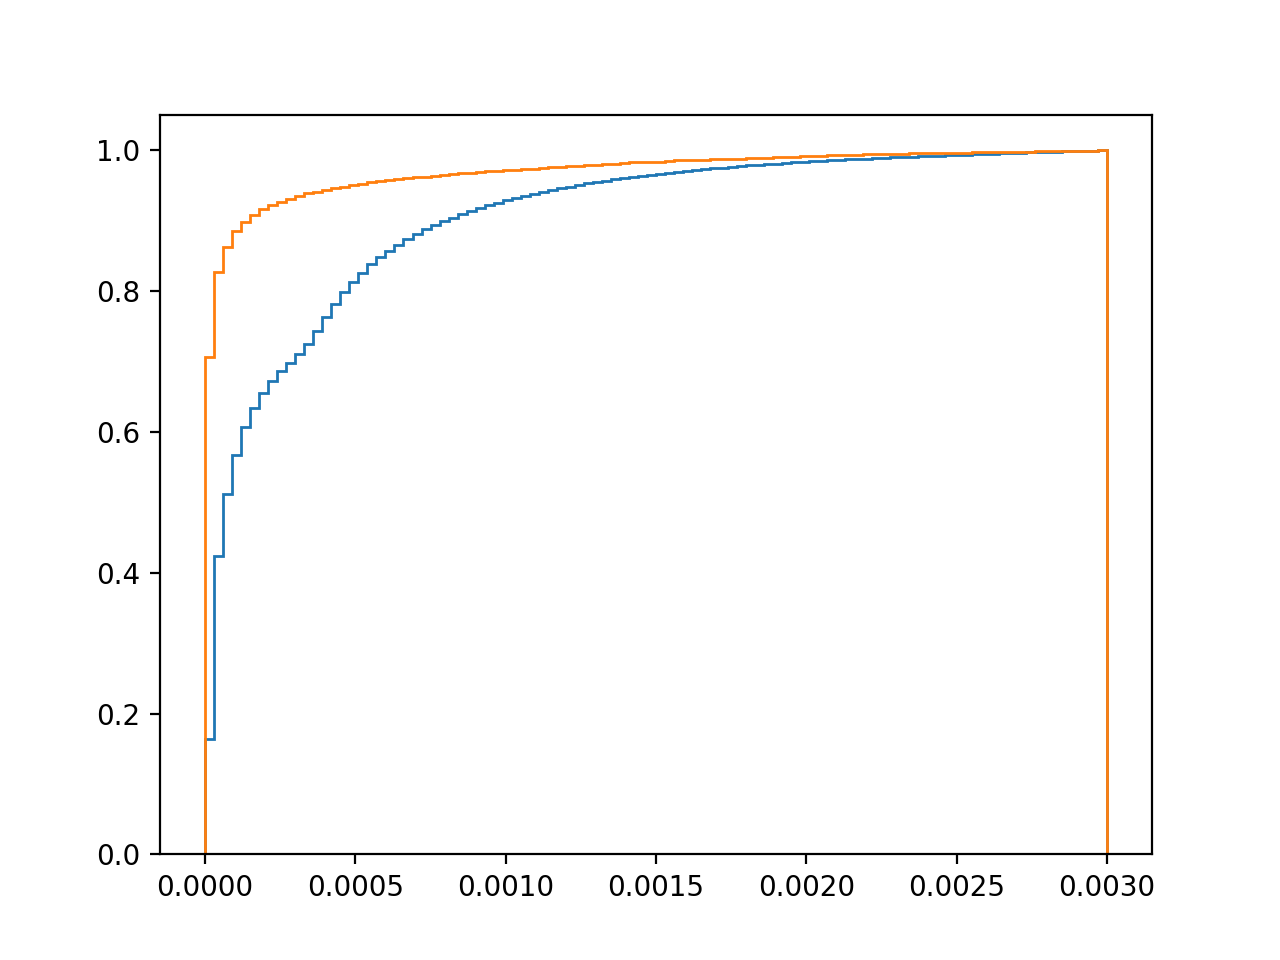

(array([ 0.7068423 ,  0.82665604,  0.86319587,  0.88513655,  0.89830935,
         0.90850359,  0.9167261 ,  0.9221798 ,  0.92692033,  0.93094769,
         0.93484918,  0.93883458,  0.94089021,  0.94374292,  0.94630197,
         0.9486093 ,  0.95062298,  0.95263666,  0.95465033,  0.95628645,
         0.95813232,  0.95930696,  0.96060746,  0.9616982 ,  0.96274699,
         0.96400554,  0.96555775,  0.96639678,  0.96740362,  0.96799094,
         0.96908168,  0.97013047,  0.97080169,  0.97155682,  0.97256366,
         0.97340269,  0.97428368,  0.97533247,  0.97612955,  0.97688468,
         0.97759785,  0.97839493,  0.97923396,  0.97990519,  0.98057641,
         0.98099593,  0.98208667,  0.9828418 ,  0.98326132,  0.98372278,
         0.9842262 ,  0.98477157,  0.98577841,  0.98619793,  0.98649159,
         0.98678525,  0.98720477,  0.98762428,  0.98779209,  0.98829551,
         0.98867307,  0.98921844,  0.98967991,  0.99022528,  0.9906448 ,
         0.99110626,  0.99139992,  0.99173554,  0.9

In [218]:
lowKronGal = np.where((ps1_df['class'] == 'GALAXY') & (stack_flux_ratio > 1))

plt.hist(ps1_df['iKronFlux'], range = (0,0.003), bins = 100, 
         normed = True, cumulative = True, histtype = "step")
plt.hist(ps1_df['iKronFlux'].ix[lowKronGal], range = (0,0.003), 
         bins = 100, normed = True, cumulative = True, histtype = "step")

<IPython.core.display.Javascript object>


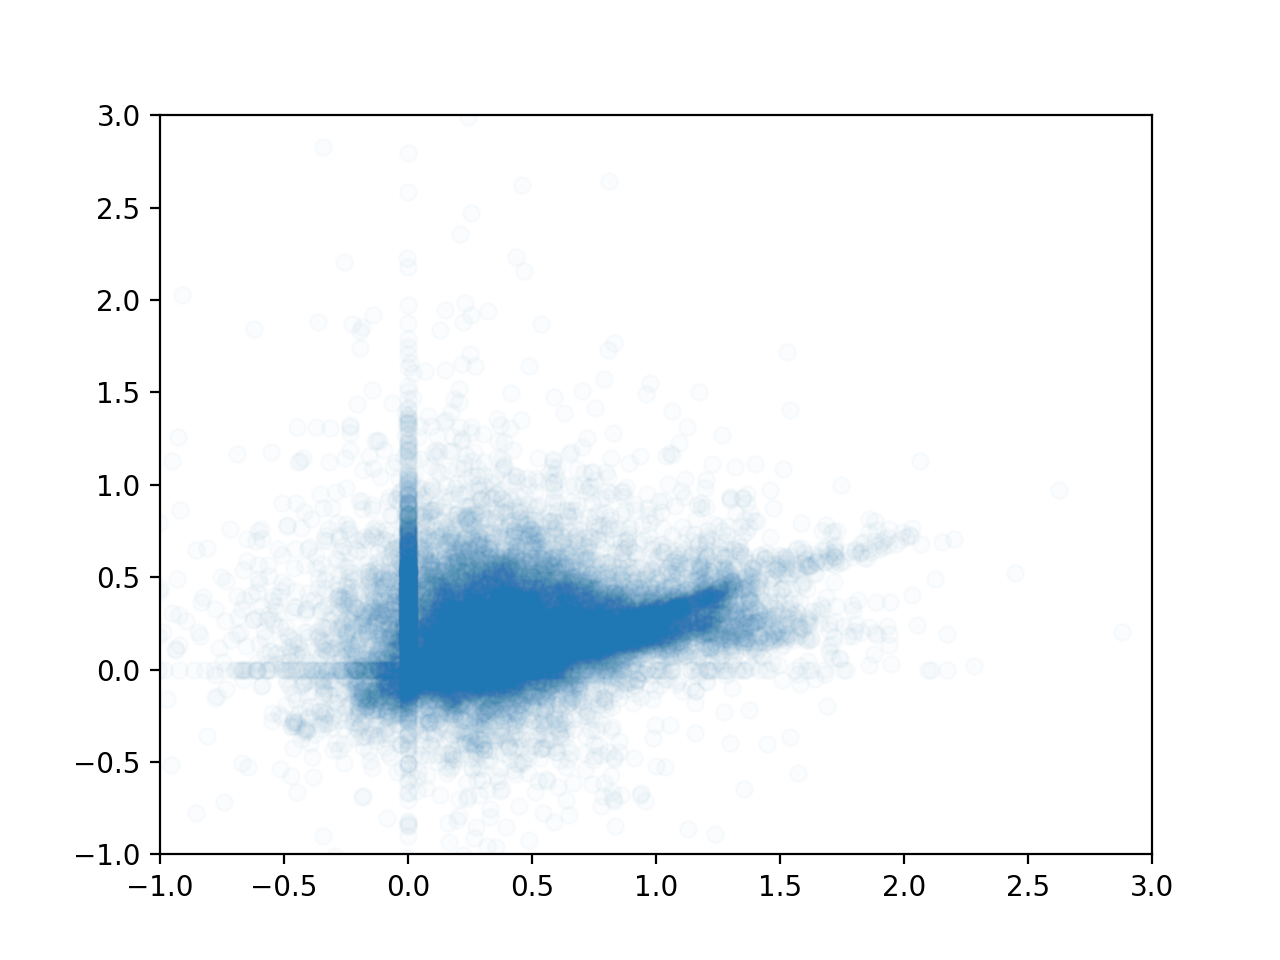

(-1, 3)

In [224]:
plt.scatter(ps1_df['gMeanKronMag'].ix[lowKronGal] - ps1_df['rMeanKronMag'].ix[lowKronGal], 
            ps1_df['iMeanKronMag'].ix[lowKronGal] - ps1_df['zMeanKronMag'].ix[lowKronGal], 
            alpha = 0.02)
plt.xlim(-1,3)
plt.ylim(-1,3)

<IPython.core.display.Javascript object>


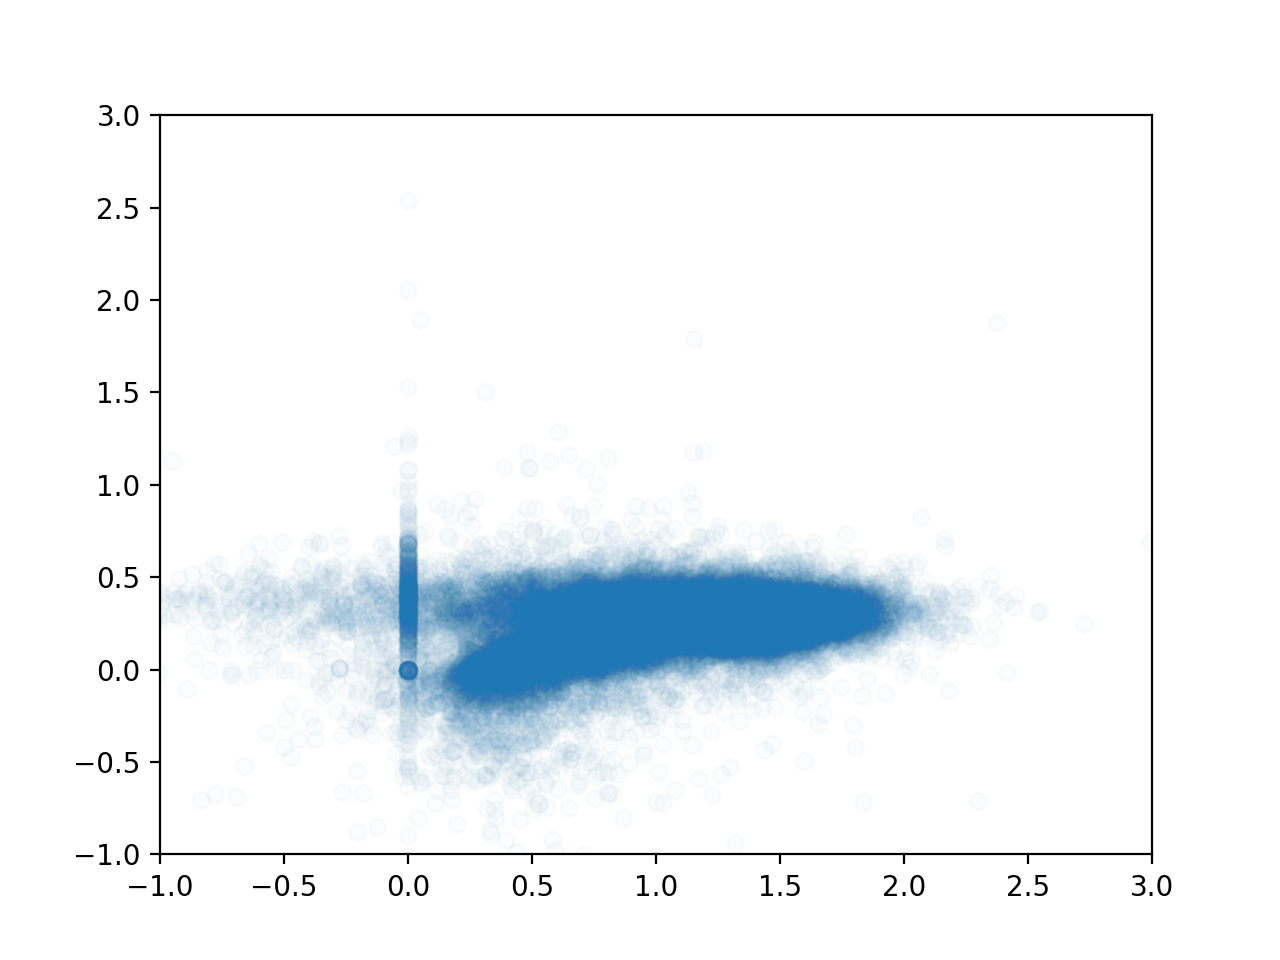

(-1, 3)

In [230]:
randomKronGal = np.where((ps1_df['class'] == 'GALAXY') & (ps1_df['dec'] > 60))


plt.scatter(ps1_df['gMeanKronMag'].ix[randomKronGal] - ps1_df['rMeanKronMag'].ix[randomKronGal], 
            ps1_df['iMeanKronMag'].ix[randomKronGal] - ps1_df['zMeanKronMag'].ix[randomKronGal], 
            alpha = 0.02)
plt.xlim(-1,3)
plt.ylim(-1,3)